In [25]:
# read road network

import momepy
import geopandas as gpd
from shapely.geometry import LineString
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from sklearn.cluster import KMeans


In [2]:
population = pd.read_csv('data/population-hanson-2020.csv',delimiter=';')
population['Population'] = population['Population']*1000
population.shape

(340, 5)

In [3]:
population.head(5)

,Name,Population,Degree centrality,Betweenness centrality,Eigenvector centrality
0,Athenae,58114.0,4,"438,104656","0,20886"
1,Chalcis,2290.0,5,"230,716898","0,206409"
2,Corinthia,63700.0,3,"2123,043135","0,067094"
3,Delos,18364.0,21,"8344,908248","0,869239"
4,Delphi,3937.0,4,"1931,259829","0,036545"


In [4]:
cities = pd.read_csv('data/Hanson2016_Cities_OxREP.csv',encoding='latin-1')
cities.shape

(1388, 12)

In [5]:
cities.head(10)

,Primary Key,Ancient Toponym,Modern Toponym,Province,Country,Barrington Atlas Rank,Barrington Atlas Reference,Start Date,End Date,Longitude (X),Latitude (Y),Select Bibliography
0,Hanson2016_1,Abae,Kalapodi,Achaea,Greece,4 or 5,55 D3,-600,NaN,22.933333,38.583333,BNP; Hansen 2006; Hansen and Nielsen 2004; PEC...
1,Hanson2016_2,Acharnae,Acharnes,Achaea,Greece,3,59 B2,-600,NaN,23.734088,38.083473,BNP; DGRG; PECS; Sear 2006.
2,Hanson2016_3,Acraephia,Akraifnio,Achaea,Greece,3,55 E4,-600,NaN,23.219702,38.452606,BNP; DGRG; Hansen and Nielsen 2004; PECS; Sear...
3,Hanson2016_4,Aegina,Aigina,Achaea,Greece,2,59 A3,-600,NaN,23.428500,37.750074,BNP; DGRG; Hansen 2006; Hansen and Nielsen 200...
4,Hanson2016_5,Aegira,Aigeira,Achaea,Greece,3,58 C1,-600,NaN,22.355720,38.147951,DGRG; Hansen and Nielsen 2004.
5,Hanson2016_6,Aegium,Aigio,Achaea,Greece,3,58 C1,-600,NaN,22.081952,38.252707,BNP; DGRG; Hansen and Nielsen 2004; PECS; Sear...
6,Hanson2016_7,Ambracia,Arta,Achaea,Greece,3,54 C3,-635,-30.0,20.987000,39.158000,BNP; DGRG; Hansen 2006; Hansen and Nielsen 200...
7,Hanson2016_8,Amphissa,Amfissa,Achaea,Greece,3,55 C3,-400,NaN,22.378406,38.527328,BNP; Hansen and Nielsen 2004; PECS.
8,Hanson2016_9,Anthedon,Anthedon,Achaea,Greece,3,55 E4,-400,NaN,23.461481,38.497543,BNP; DGRG; Hansen 2006; Hansen and Nielsen 200...
9,Hanson2016_10,Anticyra,Palatia,Achaea,Greece,3,55 D4,-400,NaN,22.632895,38.377588,BNP; DGRG; Hansen and Nielsen 2004; PECS.


In [6]:
cities_dense = cities[['Ancient Toponym','Modern Toponym','Province','Country','Longitude (X)','Latitude (Y)']]
cities_dense.head()

,Ancient Toponym,Modern Toponym,Province,Country,Longitude (X),Latitude (Y)
0,Abae,Kalapodi,Achaea,Greece,22.933333,38.583333
1,Acharnae,Acharnes,Achaea,Greece,23.734088,38.083473
2,Acraephia,Akraifnio,Achaea,Greece,23.219702,38.452606
3,Aegina,Aigina,Achaea,Greece,23.428500,37.750074
4,Aegira,Aigeira,Achaea,Greece,22.355720,38.147951


In [7]:
cities_population = population.merge(cities_dense,how='left',right_on='Ancient Toponym',left_on='Name')
cities_population

,Name,Population,Degree centrality,Betweenness centrality,Eigenvector centrality,Ancient Toponym,Modern Toponym,Province,Country,Longitude (X),Latitude (Y)
0,Athenae,58114.0,4,"438,104656","0,20886",Athenae,Athens,Achaea,Greece,23.726559,37.971119
1,Chalcis,2290.0,5,"230,716898","0,206409",Chalcis,Chalkis,Achaea,Greece,23.643172,38.549423
2,Corinthia,63700.0,3,"2123,043135","0,067094",Corinthia,Corinth,Achaea,Greece,22.879795,37.906321
3,Delos,18364.0,21,"8344,908248","0,869239",Delos,Delos,Achaea,Greece,25.267249,37.398611
4,Delphi,3937.0,4,"1931,259829","0,036545",Delphi,Delphi,Achaea,Greece,22.500000,38.483333
...,...,...,...,...,...,...,...,...,...,...,...
335,Byzantium,35321.0,8,"20746,73121","0,123053",Byzantium,Istanbul,Thracia,Turkey,28.968935,41.010111
336,Heraclea (Thracia),9280.0,6,"16101,14858","0,095004",Heraclea (Thracia),Ere?li,Thracia,Turkey,27.952973,40.971013
337,Heraclea (Thracia),9280.0,4,"7535,611646","0,063993",Heraclea (Thracia),Ere?li,Thracia,Turkey,27.952973,40.971013
338,Philippopolis (Thracia),14111.0,3,"9736,963419","0,027044",Philippopolis (Thracia),Plovdiv,Thracia,Bulgaria,24.750913,42.146652


In [8]:
cities_population[cities_population['Ancient Toponym'].isna()]

,Name,Population,Degree centrality,Betweenness centrality,Eigenvector centrality,Ancient Toponym,Modern Toponym,Province,Country,Longitude (X),Latitude (Y)


<AxesSubplot:>

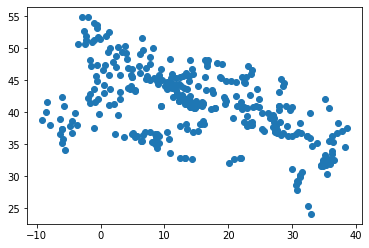

In [9]:
cities_pop_geo = gpd.GeoDataFrame(
    cities_population, geometry=gpd.points_from_xy(cities_population['Longitude (X)'], cities_population['Latitude (Y)']))
cities_pop_geo.plot()

<AxesSubplot:>

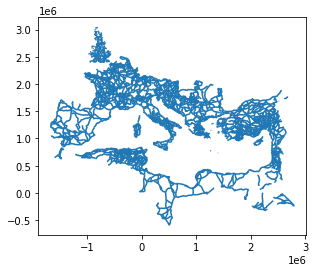

In [10]:
roads_gdf = gpd.read_file('data/roman_roads_v2008.shx')
roads_gdf.plot()

In [11]:
graph = momepy.gdf_to_nx(roads_gdf, approach='primal')
graph = momepy.node_degree(graph, name='degree')

nodes, edges, sw = momepy.nx_to_gdf(graph, points=True, lines=True,
                                    spatial_weights=True)
nodes = nodes.to_crs(epsg=4326)
nodes['lat'] = nodes['geometry'].y
nodes['lon'] = nodes['geometry'].x

edges = edges.to_crs(epsg=4326)

/Users/pauldegoffau/opt/anaconda3/envs/geo/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 105 disconnected components.
  warnings.warn(message)


In [12]:
init_centres = np.column_stack((cities_pop_geo['Longitude (X)'], cities_population['Latitude (Y)']))


In [13]:
X = np.column_stack((nodes['lat'],nodes['lon']))
kmeans = KMeans(n_clusters = len(cities_pop_geo), init = init_centres, random_state = 42)
cluster_lookup = kmeans.fit_predict(X)

/Users/pauldegoffau/opt/anaconda3/envs/geo/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1305: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)


In [14]:
cluster_lookup

array([ 15,  15,  15, ..., 291, 291, 339], dtype=int32)

In [32]:
nodes['color'] = cluster_lookup
nodes

,degree,nodeID,geometry,lat,lon,color,color_db
0,3,0,POINT (12.52787 41.57414),41.574140,12.527873,15,0
1,3,1,POINT (12.53538 41.56589),41.565885,12.535380,15,0
2,3,2,POINT (12.55260 41.54594),41.545936,12.552604,15,0
3,3,3,POINT (12.57764 41.51785),41.517850,12.577639,15,0
4,3,4,POINT (12.58009 41.51479),41.514795,12.580086,15,0
...,...,...,...,...,...,...,...
5117,3,5117,POINT (1.27620 36.42514),36.425138,1.276203,291,-1
5118,3,5118,POINT (1.31182 36.47521),36.475206,1.311818,291,-1
5119,1,5119,POINT (1.09373 36.07255),36.072549,1.093729,291,-1
5120,1,5120,POINT (2.54381 36.57117),36.571169,2.543815,291,-1


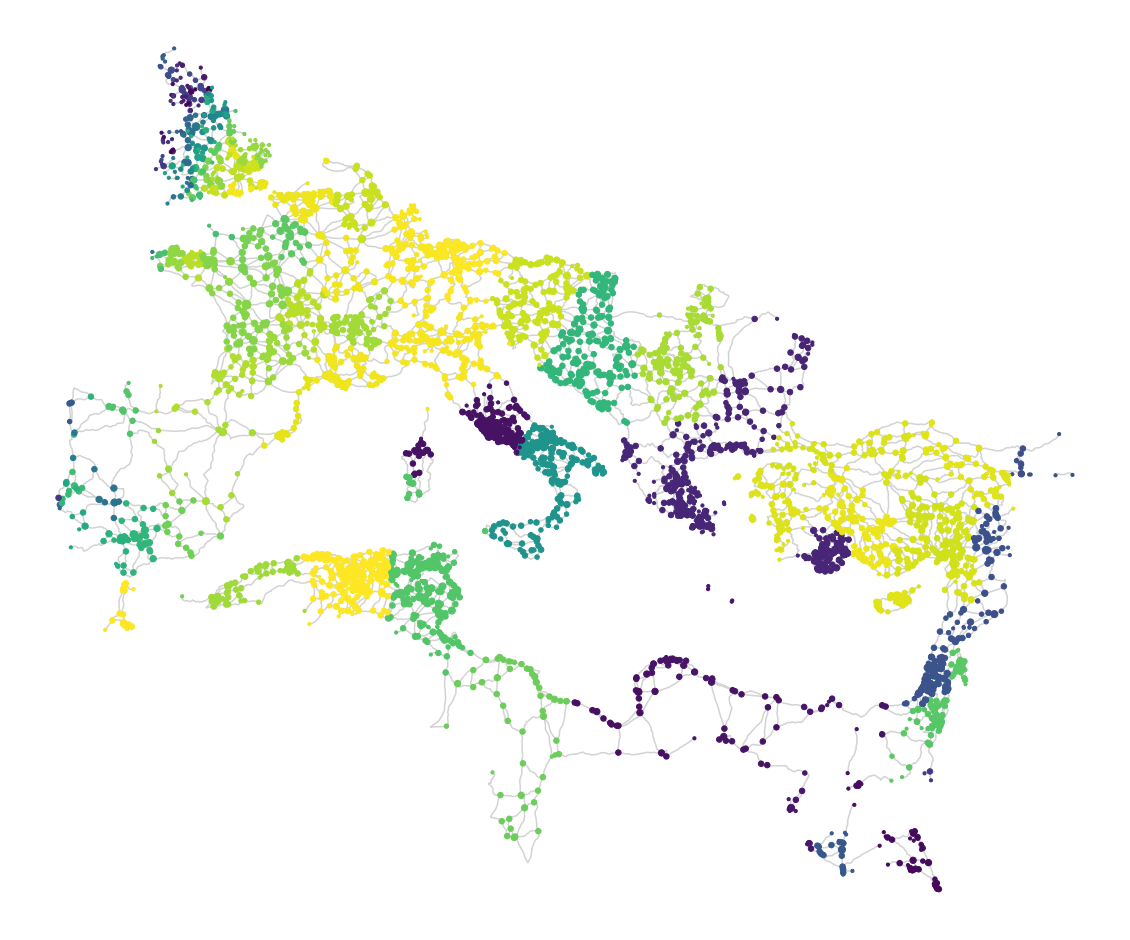

In [16]:
f, ax = plt.subplots(figsize=(20, 20))
nodes.plot(ax=ax, column='color', cmap='viridis', markersize=(nodes['degree'] * 10), zorder=2,vmin=nodes['color'].min(), vmax=nodes['color'].max())
edges.plot(ax=ax, color='lightgrey', zorder=1)
ax.set_axis_off()
plt.show()

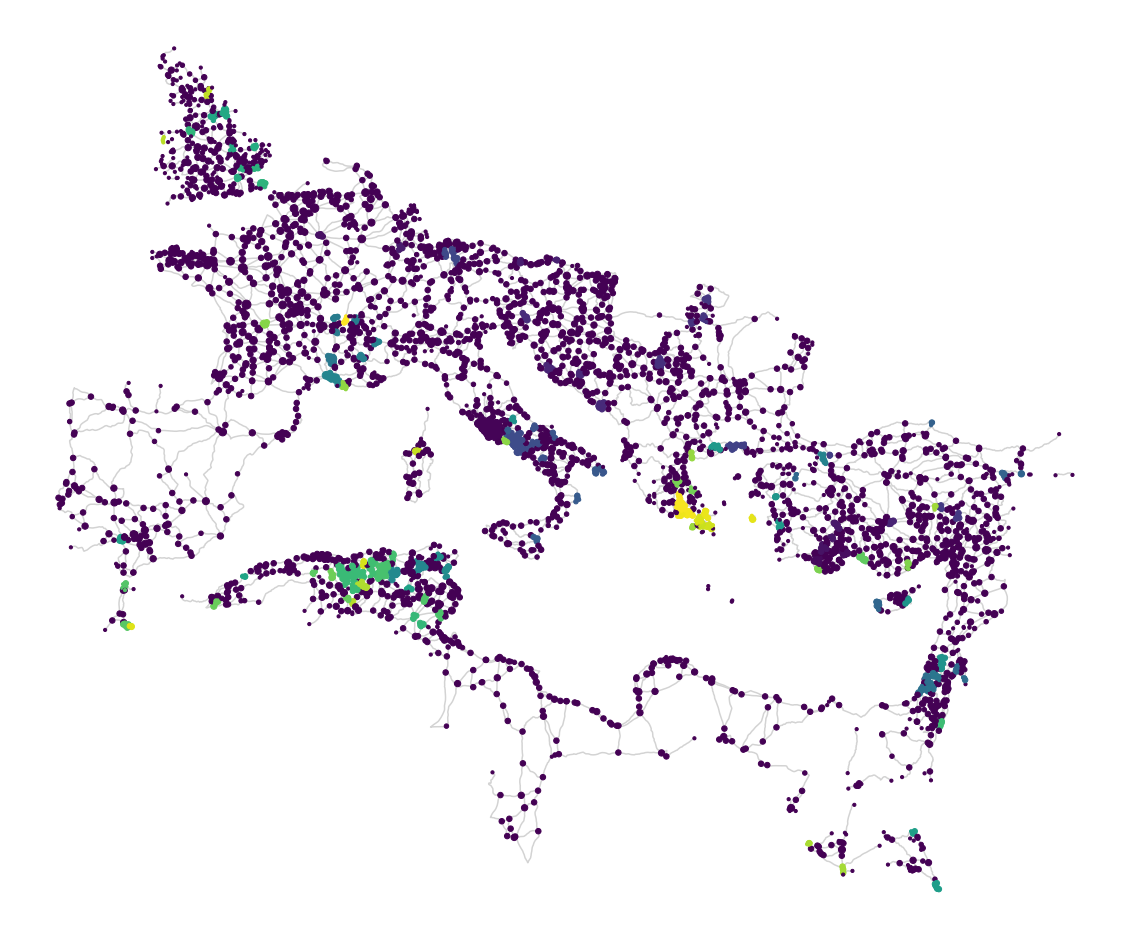

In [17]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.15)
cluster_lookup_db = dbscan.fit_predict(X)
nodes['color_db'] = cluster_lookup_db
f, ax = plt.subplots(figsize=(20, 20))
nodes.plot(ax=ax, column='color_db', cmap='viridis', markersize=(nodes['degree'] * 10), zorder=2)
edges.plot(ax=ax, color='lightgrey', zorder=1)
ax.set_axis_off()
plt.show()

In [18]:
nodes['color_db'].value_counts()

-1      3319
 0       745
 85       73
 28       54
 89       42
        ... 
 42        5
 65        5
 40        5
 60        5
 120       3
Name: color_db, Length: 128, dtype: int64

In [49]:
simplified_graph = nx.Graph()
nodes_unlabeled = nodes[nodes['color_db']==-1]
clustered_nodes = nodes[nodes['color_db']!=-1].groupby('color_db').agg({'lat':'mean', 'lon':'mean','nodeID':lambda x: list(x)})

def transform_edge(edge) :

    if (edge.node_start in nodes_unlabeled.nodeID) :
        if (edge.node_end in nodes_unlabeled.nodeID) :
            return edge
        else :
            for node_bags in clustered_nodes.nodeID :
                if edge.node_end in node_bags :
                    end_nodeID = node_bags[0]
                    from_node_geo = nodes[nodes['nodeID']==edge.node_start].geometry
                    end_node_geo = nodes[nodes['nodeID']==edge.node_end].geometry
                    #TODO ,'geometry':LineString(from_node_geo,end_node_geo)
                    newEdge = {'node_start':edge.node_start,'node_end':end_nodeID}
                    return newEdge
    else :
        if (edge.node_end in nodes_unlabeled.nodeID) :
            
            for node_bags in clustered_nodes.nodeID :
                if edge.node_start in node_bags :
                    start_nodeID = node_bags[0]
                    from_node_geo = nodes[nodes['nodeID']==edge.node_start].geometry
                    end_node_geo = nodes[nodes['nodeID']==edge.node_end].geometry
                    
                    # TODO ,'geometry':LineString(from_node_geo,end_node_geo)
                    
                    newEdge = {'node_start':start_nodeID,'node_end':edge.node_end}
                    return newEdge        
        else :
            
            start_node_id = {}
            end_node_id = {} 
            
            for node_bags in clustered_nodes.nodeID :
                if edge.node_start in node_bags :
                    start_node_id = node_bags[0]
                
            for node_bags in clustered_nodes.nodeID :
                if edge.node_end in node_bags :
                    end_node_id = node_bags[0]
            
            from_node_geo = nodes[nodes['nodeID']==edge.node_start].geometry
            end_node_geo = nodes[nodes['nodeID']==edge.node_end].geometry
            
            # TODO: 'geometry':LineString(from_node_geo,end_node_geo)
            
            newEdge = {'node_start':start_node_id,'node_end':end_node_id}
            return newEdge


edges_new = edges.apply(transform_edge,axis=1)
#edges_new = edges[(edges['node_start'].isin(nodes_unlabeled.nodeID) & edges['node_end'].isin(nodes_unlabeled.nodeID))]



In [33]:
nodes[nodes['nodeID']==51].geometry

51    POINT (7.37712 46.21660)
Name: geometry, dtype: geometry

In [22]:
nodes_unlabeled

,degree,nodeID,geometry,lat,lon,color,color_db
51,3,51,POINT (7.37712 46.21660),46.216599,7.377119,292,-1
210,3,210,POINT (36.23230 36.40885),36.408850,36.232296,314,-1
211,3,211,POINT (36.18186 36.20075),36.200750,36.181862,319,-1
212,3,212,POINT (36.19120 36.48976),36.489756,36.191202,314,-1
213,3,213,POINT (36.13941 36.55732),36.557322,36.139409,314,-1
...,...,...,...,...,...,...,...
5116,1,5116,POINT (2.22430 36.25253),36.252528,2.224303,291,-1
5117,3,5117,POINT (1.27620 36.42514),36.425138,1.276203,291,-1
5118,3,5118,POINT (1.31182 36.47521),36.475206,1.311818,291,-1
5119,1,5119,POINT (1.09373 36.07255),36.072549,1.093729,291,-1


In [23]:
clustered_nodes

,lat,lon,nodeID
color_db,,,
0,41.805462,12.676253,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,46.111617,7.076900,"[52, 488, 1716, 1717, 4080]"
2,36.668654,29.307753,"[255, 3049, 3050, 3051, 3062, 3620, 3633, 3851..."
3,36.914574,30.694186,"[258, 259, 261, 262, 267, 327, 330, 3048, 3987]"
4,49.263388,4.078679,"[277, 278, 279, 280, 281]"
...,...,...,...
122,38.472005,23.648250,"[4788, 4841, 4842, 4850, 4880, 4882, 4891, 489..."
123,38.422198,22.339691,"[4851, 4852, 4863, 4864, 4865, 4866, 4878, 4879]"
124,38.447914,22.778042,"[4853, 4854, 4859, 4860, 4867, 4868, 4873, 487..."


In [53]:
edges_new.head(100)

0     {'node_start': 0, 'node_end': 0}
1     {'node_start': 0, 'node_end': 0}
2     {'node_start': 0, 'node_end': 0}
3     {'node_start': 0, 'node_end': 0}
4     {'node_start': 0, 'node_end': 0}
                    ...               
95    {'node_start': 0, 'node_end': 0}
96    {'node_start': 0, 'node_end': 0}
97    {'node_start': 0, 'node_end': 0}
98    {'node_start': 0, 'node_end': 0}
99    {'node_start': 0, 'node_end': 0}
Length: 100, dtype: object